In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

## Example Code

### Original Vs Synthetically Generated Image

In [92]:
# Load the reference image
reference_img = cv2.imread('../Data/Variation_Synthetic_Generation/train/Water/Water_001.png')

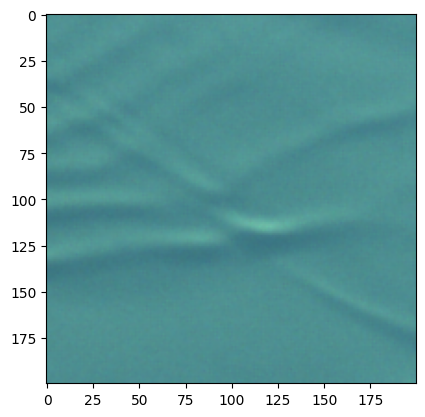

In [93]:
plt.imshow(cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB))
plt.show()

In [94]:
# Load the image to be color-corrected
input_img = cv2.imread('../Data/Variation_Synthetic_Generation/train/Water/Water_001_1.png')

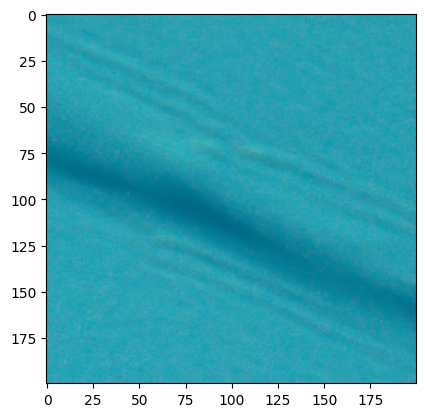

In [95]:
plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
plt.show()

### Example Application of Color Correction

In [96]:
# Convert the reference image to the LAB color space
reference_img_lab = cv2.cvtColor(reference_img, cv2.COLOR_BGR2LAB)

In [97]:
# Convert the input image to the LAB color space
input_img_lab = cv2.cvtColor(input_img, cv2.COLOR_BGR2LAB)

In [98]:
# Calculate the mean and standard deviation of the reference image in each channel
reference_img_mean, reference_img_std = cv2.meanStdDev(reference_img_lab)
reference_img_mean = np.squeeze(reference_img_mean)
reference_img_std = np.squeeze(reference_img_std)

In [99]:
print("Reference Image mean",reference_img_mean)
print("Reference Image Standard Deviation",reference_img_std)

Reference Image mean [140.840475 107.821075 120.2182  ]
Reference Image Standard Deviation [6.39298653 1.81994803 1.9710248 ]


In [100]:
# Calculate the mean and standard deviation of the input image in each channel
input_img_mean, input_img_std = cv2.meanStdDev(input_img_lab)
input_img_mean = np.squeeze(input_img_mean)
input_img_std = np.squeeze(input_img_std)

In [101]:
print("Reference Image mean",input_img_mean)
print("Reference Image Standard Deviation",input_img_std)

Reference Image mean [150.159925 103.411975 109.24135 ]
Reference Image Standard Deviation [11.94596162  2.73512369  1.78938542]


In [102]:
# Apply color correction to the input image using the mean and standard deviation of the reference image and input image in each channel
for i in range(3):
    input_img_lab[:, :, i] = ((input_img_lab[:, :, i] - input_img_mean[i]) * (reference_img_std[i] / input_img_std[i])) + reference_img_mean[i]

In [103]:
# Convert the color-corrected image back to the BGR color space
output_img = cv2.cvtColor(input_img_lab, cv2.COLOR_LAB2BGR)

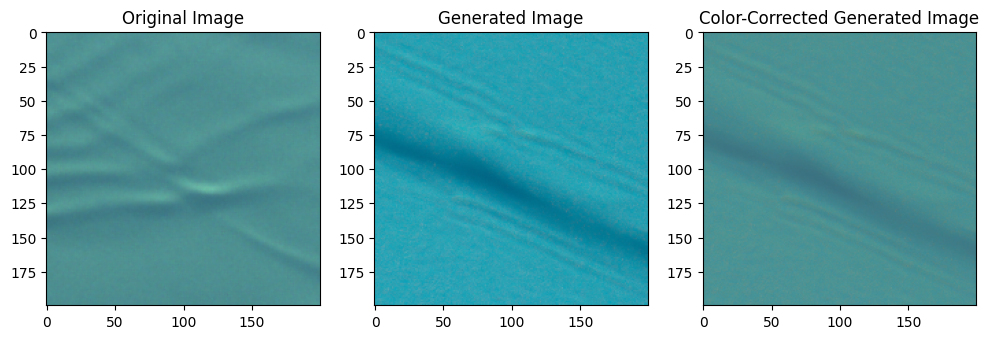

In [104]:
# Create a grid of subplots with 1 row and 3 columns
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Plot each image in a separate subplot
ax[0].imshow(cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Generated Image')
ax[2].imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
ax[2].set_title('Color-Corrected Generated Image')

# Show the plot
plt.savefig('exampl4.png')
plt.show()

## Application of Color Correction on the Synthically Generated Images

In [27]:
dirs = os.listdir("../Data/Variation_Synthetic_Generation_color_corrected/train/")
for directory in dirs:
    
    path = "../Data/Variation_Synthetic_Generation_color_corrected/train/" + directory + "/"
    files = os.listdir(path)
    
    references = []
    generated = []

    for string in files:
        underscore_count = string.count('_')
        if underscore_count == 1:
            references.append(string)
        elif underscore_count > 1:
            generated.append(string)
            
    for reference in references:
        sub_generated = [string for string in generated if reference[-8:-4] in string]
        
        print(reference)
        
        reference_img = cv2.imread(path+reference)
        
        for gen in sub_generated:
            input_img = cv2.imread(path+gen)
            
            # Convert the reference image to the LAB color space
            reference_img_lab = cv2.cvtColor(reference_img, cv2.COLOR_BGR2LAB)
            # Convert the input image to the LAB color space
            input_img_lab = cv2.cvtColor(input_img, cv2.COLOR_BGR2LAB)
            
            # Calculate the mean and standard deviation of the reference image in each channel
            reference_img_mean, reference_img_std = cv2.meanStdDev(reference_img_lab)
            reference_img_mean = np.squeeze(reference_img_mean)
            reference_img_std = np.squeeze(reference_img_std)
            
            # Calculate the mean and standard deviation of the input image in each channel
            input_img_mean, input_img_std = cv2.meanStdDev(input_img_lab)
            input_img_mean = np.squeeze(input_img_mean)
            input_img_std = np.squeeze(input_img_std)
            
            # Apply color correction to the input image using the mean and standard deviation of the reference image and input image in each channel
            for i in range(3):
                input_img_lab[:, :, i] = ((input_img_lab[:, :, i] - input_img_mean[i]) * (reference_img_std[i] / input_img_std[i])) + reference_img_mean[i]
                
            # Convert the color-corrected image back to the BGR color space
            output_img = cv2.cvtColor(input_img_lab, cv2.COLOR_LAB2BGR)
            
            cv2.imwrite(path + gen, output_img)

Natural_002.png
Natural_009.png
Natural_003.png
Natural_005.png
Natural_007.png
Snow_001.png
Snow_002.png
Snow_003.png
Snow_007.png
Snow_006.png
River_009.png
River_006.png
River_005.png
River_001.png
River_002.png
Mountain_005.png
Mountain_001.png
Mountain_002.png
Mountain_003.png
Mountain_010.png
Agricultural_007.png
Agricultural_006.png
Agricultural_001.png
Agricultural_002.png
Agricultural_003.png
Cloud_010.png
Cloud_001.png
Cloud_009.png
Cloud_008.png
Cloud_007.png
Seaice_002.png
Seaice_007.png
Seaice_005.png
Seaice_010.png
Seaice_001.png
Water_008.png
Water_003.png
Water_006.png
Water_002.png
Water_001.png
